# Assignments Session 6-11

## 2.1. Problem Statement: Numpy

### Problem Statement 1: 
 
 
Write a function so that the columns of the output matrix are powers of the input vector. 
 
The order of the powers is determined by the increasing boolean argument. Specifically, when increasing is False, the i-th output column is the input vector raised element-wise to the power of N - i - 1. 
 
HINT: Such a matrix with a geometric progression in each row is named for AlexandreTheophile Vandermonde. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.array([1, 2, 3, 5])

In [3]:
## Using numpy.vander function
N = 3
np.vander(x, N)

array([[ 1,  1,  1],
       [ 4,  2,  1],
       [ 9,  3,  1],
       [25,  5,  1]])

### Problem Statement 2: 
 
Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average of the given sequence is defined as follows: 
 
The moving average sequence has n-k+1 elements as shown below. 
 
The moving averages with k=4 of a ten-value sequence (n=10) is shown below 
 
i 1 2 3 4 5 6 7 8 9 10  ===== == == == == == == == == == ==  Input 10 20 30 40 50 60 70 80 90 100  y1 25 = (10+20+30+40)/4  y2 35 = (20+30+40+50)/4  y3 45 = (30+40+50+60)/4  y4 55 = (40+50+60+70)/4  y5 65 = (50+60+70+80)/4  y6 75 = (60+70+80+90)/4  y7 85 = (70+80+90+100)/4 
 
 
Thus, the moving average sequence has n-k+1=10-4+1=7 values. 
 
Question: Write a function to find moving average in an array over a window: Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3. 

In [4]:
def moving_average(a, n=3) :
    get = np.cumsum(a, dtype=float)
    get[n:] = get[n:] - get[:-n]
    return get[n - 1:] / n

In [5]:
test = [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] 

In [6]:
moving_average(test, n=3)

array([  5.        ,   4.66666667,   5.66666667,   6.66666667,
         9.66666667,  28.66666667,  49.33333333,  72.66666667,
        84.        ,  93.33333333, 116.33333333])

## 2.2. Problem Statement: Pandas

### Problem Statement 1: 
 
1) How-to-count-distance-to-the-previous-zero 
 
For each value, count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) and if there are no previous zeros, print the position 
 
Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]} 
 
The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'. 
 import pandas as pd 
 
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}) 

In [7]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

In [8]:
df

,X
0,7
1,2
2,0
3,3
4,4
5,2
6,5
7,0
8,3
9,4


In [9]:

def till_zero(X):
    Y = []
    cnt = 0
    for i in range(len(X)):
        if X[i] != 0:
            cnt += 1
            Y.append(cnt)
        else:
            cnt = 0
            Y.append(cnt)
    return Y
        

In [10]:
df['Y'] = till_zero(df['X'])

In [11]:
df

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


### Problem Statement 1: 
2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. 

In [12]:
from pandas.tseries.offsets import *

In [13]:
date = pd.date_range('2015-01-01', '2015-12-31', freq = BDay())
np.random.seed(18)
data = np.random.randint( 0,1000, len(date))

In [14]:
year_working = pd.DataFrame({'date': date,
                             's': data})


In [15]:
year_working

,date,s
0,2015-01-01,298
1,2015-01-02,275
2,2015-01-05,120
3,2015-01-06,837
4,2015-01-07,702
5,2015-01-08,945
6,2015-01-09,174
7,2015-01-12,242
8,2015-01-13,578
9,2015-01-14,264


In [16]:
year_working['Day_ofweek'] =  pd.to_datetime(year_working['date']).dt.dayofweek
year_working.set_index('date', inplace = True)

In [17]:
year_working

,s,Day_ofweek
date,,
2015-01-01,298,3
2015-01-02,275,4
2015-01-05,120,0
2015-01-06,837,1
2015-01-07,702,2
2015-01-08,945,3
2015-01-09,174,4
2015-01-12,242,0
2015-01-13,578,1


### Problem Statement 1:
3) Find the sum of the values in s for every Wednesday

In [18]:
year_working['Day_ofweek']   = year_working['Day_ofweek'].map({0: 'Monday',
                                                                  1: 'Tuesday',
                                                                  2:'Wednesday',
                                                                  3:'Thursday',
                                                                  4:'Friday'})

In [19]:
year_working

,s,Day_ofweek
date,,
2015-01-01,298,Thursday
2015-01-02,275,Friday
2015-01-05,120,Monday
2015-01-06,837,Tuesday
2015-01-07,702,Wednesday
2015-01-08,945,Thursday
2015-01-09,174,Friday
2015-01-12,242,Monday
2015-01-13,578,Tuesday


In [20]:
year_working[year_working['Day_ofweek'] == 'Wednesday']['s'].sum()

27993

### Problem Statement 1: 
4) Average For each calendar month

In [21]:
year_working.resample('M').mean()

,s
date,
2015-01-31,524.727273
2015-02-28,577.850000
2015-03-31,621.090909
2015-04-30,594.318182
2015-05-31,545.523810
2015-06-30,422.636364
2015-07-31,578.217391
2015-08-31,495.619048
2015-09-30,489.772727


### Problem Statement 1: 
5) For each group of four consecutive calendar months in s, find the date on which the highest value occurred. 

In [22]:
year_working['Date'] = year_working.index

In [23]:
year_working.loc[year_working.groupby(year_working['Date'].dt.quarter)['s'].idxmax()]

,s,Day_ofweek,Date
date,,,
2015-02-06,961,Friday,2015-02-06
2015-05-19,995,Tuesday,2015-05-19
2015-07-03,998,Friday,2015-07-03
2015-12-18,962,Friday,2015-12-18


### Problem Statement 2: 
 
Read the dataset from the below link 
 
 
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Nam es_right.csv 
 
 
Questions: 
 
1) Delete unnamed columns 
 
2) Show the distribution of male and female 
 
3) Show the top 5 most preferred names 
 
4) What is the median name occurrence in the dataset 
 
5) Distribution of male and female born count by states 

In [25]:
babies = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv ')

### Question 1: Delete unnamed columns

In [26]:
del babies['Unnamed: 0']

### Question 2: Distribution of Male and Female

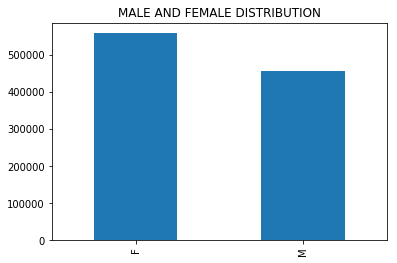

In [27]:
babies['Gender'].value_counts().plot(kind = 'bar', title ='MALE AND FEMALE DISTRIBUTION')

### Question 3: Top 5 prefered names

In [28]:
babies.groupby('Name')['Count'].sum().sort_values(ascending = False).head(5)

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64

### Question 4: What is the median name occurrence in the dataset

In [31]:
total_occurrence = babies.groupby('Name')['Count'].sum() 
total_occurrence = pd.DataFrame(total_occurrence)
print(total_occurrence['Count'].median())

49.0


In [233]:
total_occurrence[total_occurrence['Count'] == 49]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
Antonina,49
Aveline,49
Aziah,49
Baily,49


### Question 5: Distribution of male and female born count by states

In [32]:
babies['State'].nunique()

51

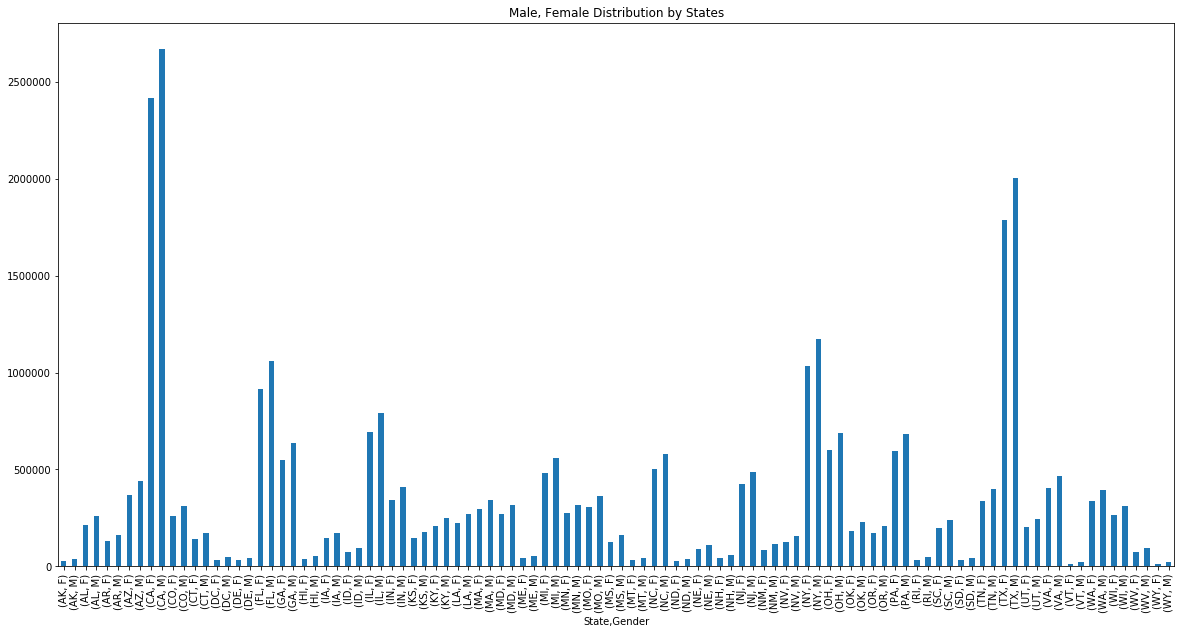

In [33]:
plt.figure(figsize=(20,10))
babies.groupby(['State','Gender'])['Count'].sum().plot(kind = 'bar', title= 'Male, Female Distribution by States')

## 2.3. Problem Statement: Use Cases on Numpy and Pandas 

### Question 1
Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception handling using try-catch which gives the output as: 
 
Output: 
 
1) If the List element is a alphabet or string, the output will be 
 
The entry is a Oops! <class 'ValueError'> occured. Next entry. 
 
2) If the List element is “0”,the output will be 
 
The entry is 0 Oops! <class 'ZeroDivisionError'> occured.  Next entry. 
 
3) If the List element is and integer except 0,then output will be: 
 
The entry is 2 The reciprocal of 2 is 0.5 // reciprocal of an integer 

In [34]:
def acceptRandomList(randomList):
    for i in randomList:
        try:
            if type(i) == str:
                raise(ValueError(''))
            elif i == 0:
                raise(ZeroDivisionError(i))
            else:
                r = 1/i
                print("The reciprocal of %d is %d" % (i,r))
        except ValueError:
            print(''' The entry is a String 
 Oops! %s occured. 
 Next Entry.''' % ValueError)
        except ZeroDivisionError:
            print(''' The entry is 0 
 Oops! %s occured. 
 Next Entry.''' % ZeroDivisionError)


In [35]:
class ValueError(Exception):
    """Base class for other exceptions"""
    pass 

class ZeroDivisionError(Exception):
    """Base class for other exceptions"""
    pass

In [36]:
randList = ['12', 0, 2]
acceptRandomList(randList)

 The entry is a String 
 Oops! <class '__main__.ValueError'> occured. 
 Next Entry.
 The entry is 0 
 Oops! <class '__main__.ZeroDivisionError'> occured. 
 Next Entry.
The reciprocal of 2 is 0


### Question 2
Array out of Bound Exception 
 
Write a Python program to give exception “Array Out of Bound” if the user wants to access the elements beyond the list size (use try and except) 

In [37]:
def getListVal(randList, index):
    try:
        randList[index]
    except Exception:
        print('Array Out of Bound')

In [38]:
listv = [1,2,3,4,5,6]
getListVal(listv, 10)

Array Out of Bound


### Question 3
Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py. 
 
Note : The module created as fibo.py has to be placed in lib folder 
 
For linux/ubuntu path = /home/anaconda/lib/python3 For Windows path = C:\Users\Ajit\Anaconda3\Lib 

In [39]:
def fib2():
    listB = []
    n1 = 0
    n2 = 1
    nth = 0
    listB.append(n1)
    listB.append(n2)
    while nth < 1000:
        nth = n1 + n2
        if (nth < 1000):
            listB.append(nth)
        # update values
        n1 = n2
        n2 = nth
    return listB

In [40]:
fib2()

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

### Question 4
Write a python module script that contains ispalindrome() method to calculate the input string as palindrome string or not and save it as palindrome.py.

In [41]:
def ispalindrome(inputVal):
    if type(inputVal) == str:
        resVal = inputVal[::-1]
        if inputVal == resVal:
            return True
        else:
            return False
    else:
        print('Please enter String val to check')

In [42]:
ispalindrome('malayalam')

True

### Question 6
Get Data from the following link: 
 
http://files.grouplens.org/datasets/movielens/ml-20m.zip 
 
We will be using the following files for this exercise: 
 
ratings.csv : userId,movieId,rating, timestamp tags.csv : userId,movieId, tag, timestamp movies.csv : movieId, title, genres 
 

In [44]:
# I. Read the dataset using pandas. 
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
movies = pd.read_csv('movies.csv')

In [45]:
# II. Extract the first row from tags and print its type. 
type(tags.iloc[0,:])

pandas.core.series.Series

In [46]:
# III.  Extract row 0, 11, 2000 from tags DataFrame.
tags.loc[[0,11,2000],:]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


In [47]:
# IV.  Print index, columns of the DataFrame. 
print(tags.columns)
print(tags.index)

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
RangeIndex(start=0, stop=465564, step=1)


In [48]:
# V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().
mean = ratings.rating.mean()
median = ratings.rating.median()
std = ratings.rating.std()
minVal = ratings.rating.min()
maxVal = ratings.rating.max()
quantile = ratings.rating.quantile([0.25,0.50,0.75])
print('Mean Val ', mean)
print('median Val ', median)
print('SD Val ', std)
print('Min Val ', minVal)
print('Max Val ', maxVal)
print('quantile Val', quantile)

Mean Val  3.5255285642993797
median Val  3.5
SD Val  1.051988919275684
Min Val  0.5
Max Val  5.0
quantile Val 0.25    3.0
0.50    3.5
0.75    4.0
Name: rating, dtype: float64


In [49]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [50]:
# VI. Filter out ratings with rating > 5
ratings[ratings.rating > 5]

,userId,movieId,rating,timestamp


In [51]:
# VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified. 
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [52]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [53]:
tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [54]:
tags[tags.isnull().any(axis=1)]

,userId,movieId,tag,timestamp
373276,116460,123,NaN,1199450867
373277,116460,346,NaN,1199451946
373281,116460,1184,NaN,1199452261
373288,116460,1785,NaN,1199452006
373289,116460,2194,NaN,1199450677
373291,116460,2691,NaN,1199451002
373299,116460,4103,NaN,1199451920
373301,116460,4473,NaN,1199451040
373303,116460,4616,NaN,1199452441
373319,116460,7624,NaN,1199452266


In [55]:
tags[tags.isnull().any(axis=1)].shape

(16, 4)

16 rows in tags have null values, it can be deleted.

In [56]:
# VIII. Filter out movies from the movies DataFrame that are of type 'Animation'
movies[movies['genres'].str.contains("Animation")]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [57]:
# IX. Find the average rating of movies. 
ratings['rating'].mean()

3.5255285642993797

In [58]:
# X. Perform an inner join of movies and tags based on movieId. 
pd.merge(movies, tags, how='inner', on='movieId').head(5)

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


In [59]:
# XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.
ratingM = pd.merge(movies, ratings, how='inner', on='movieId')
ratingM[(ratingM['genres'].str.contains("Comedy")) & (ratingM['rating'] > 4) ]

,movieId,title,genres,userId,rating,timestamp
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,1225311239
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0,855176628
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,5.0,846509445
15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,39,5.0,859325696
19,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0,1144058408
20,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,59,4.5,1380400521
24,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,82,5.0,1317331523
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,84,5.0,832543433


In [60]:
# XII. Split 'genres' into multiple columns. 
genres = pd.DataFrame(movies['genres'].apply(lambda x: x.split('|')).tolist())

In [61]:
genres

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [62]:
# XIII. Extract year from title e.g. (1995).
movies['title'].apply(lambda x: x[-6:])

0        (1995)
1        (1995)
2        (1995)
3        (1995)
4        (1995)
5        (1995)
6        (1995)
7        (1995)
8        (1995)
9        (1995)
10       (1995)
11       (1995)
12       (1995)
13       (1995)
14       (1995)
15       (1995)
16       (1995)
17       (1995)
18       (1995)
19       (1995)
20       (1995)
21       (1995)
22       (1995)
23       (1995)
24       (1995)
25       (1995)
26       (1995)
27       (1995)
28       (1995)
29       (1995)
          ...  
27248    (1999)
27249    (2011)
27250    (2006)
27251    (1966)
27252    (1999)
27253    (2002)
27254    (1991)
27255    (2009)
27256    (2014)
27257    (2011)
27258    (2009)
27259    (2014)
27260    (2015)
27261    (2013)
27262    (2014)
27263    (2014)
27264    (2015)
27265    (2014)
27266    (2010)
27267    (2011)
27268    (2000)
27269    (2003)
27270    (2006)
27271    (2000)
27272    (2001)
27273    (2007)
27274    (2002)
27275    (2014)
27276    (2001)
27277    (2014)
Name: title, Length: 272

In [63]:
tags['date'] = pd.to_datetime(tags['timestamp'].astype(int), unit='s')

In [64]:
# XIV. Select rows based on timestamps later than 2015-02-01.
tags.set_index('date', inplace = True)

In [65]:
tags.loc['2015-02-01':]

,userId,movieId,tag,timestamp
date,,,,
2015-02-20 22:42:49,318,260,1970s,1424472169
2015-02-20 22:42:49,318,260,fantasy,1424472169
2015-02-20 22:42:49,318,260,sci-fi,1424472169
2015-02-21 15:58:30,318,115149,Action,1424534310
2015-02-21 15:58:03,318,115149,Revenge,1424534283
2015-02-21 15:59:43,318,115149,Willem Dafoe,1424534383
2015-02-08 19:48:18,342,318,masterplan,1423424898
2015-02-08 19:48:18,342,318,prison escape,1423424898
2015-02-08 19:48:18,342,318,redemption,1423424898


In [66]:
# XV. Sort the tags DataFrame based on timestamp.
tags.sort_index()

,userId,movieId,tag,timestamp
date,,,,
2005-12-24 13:00:10,100371,2788,monty python,1135429210
2005-12-24 13:00:36,100371,1732,coen brothers,1135429236
2005-12-24 13:00:48,100371,1206,stanley kubrick,1135429248
2005-12-24 13:02:51,100371,1193,jack nicholson,1135429371
2005-12-24 13:03:19,100371,5004,peter sellers,1135429399
2005-12-24 13:03:32,100371,47,morgan freeman,1135429412
2005-12-24 13:03:32,100371,47,brad pitt,1135429412
2005-12-24 13:03:51,100371,4011,brad pitt,1135429431
2005-12-24 13:03:51,100371,4011,guy ritchie,1135429431


## 2.4. Problem Statement: Matplotlib 

This assignment is for visualization using matplotlib: 
 
data to use: 
 
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 
 
titanic = pd.read_csv(url) 

### Question 1:
Create a pie chart presenting the male/female proportion 

In [67]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [68]:
titanic['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

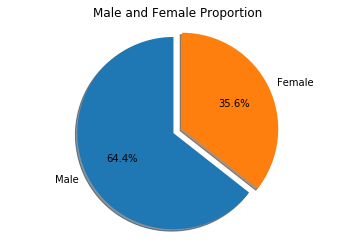

In [69]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = [843,466]
explode = (0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Male and Female Proportion')
plt.show()

### Question 2
Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [70]:
male = titanic[titanic['sex'] == 'male'].copy()
female = titanic[titanic['sex'] == 'female'].copy()

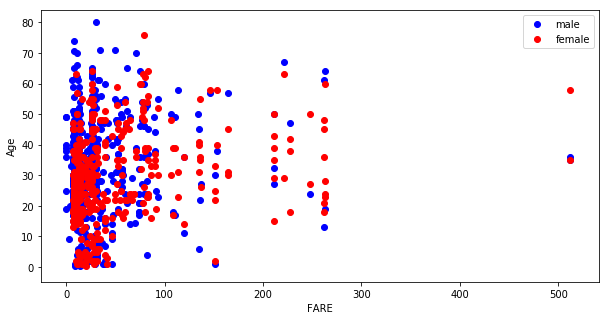

In [71]:
plt.figure(figsize=(10,5))
plt.scatter(male['fare'],male['age'] ,c ='b', label = 'male')
plt.scatter(female['fare'],female['age'] ,c ='r', label = 'female')
plt.xlabel('FARE')
plt.ylabel('Age')
plt.legend()

plt.show()

## 2.5. Problem Statement: Data Cleaning

In [73]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',

'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],

'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})

In [74]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


### Question 1
Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).

In [75]:
df.loc[1,'FlightNumber'] = 10055.0
df.loc[3,'FlightNumber'] = 10075.0

### Question 2
The From_To column would be better as two separate columns! Split each string on the
underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
correct column names to this temporary DataFrame.

In [76]:
travel = pd.DataFrame({'From': df['From_To'].apply(lambda x: x.split('_')[0]),
                       'To':  df['From_To'].apply(lambda x: x.split('_')[1])})


In [77]:
travel

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


### Question 3
Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
"London".)

In [78]:
travel['From'] = travel['From'].apply(lambda x: x.capitalize())
travel['To'] = travel['To'].apply(lambda x: x.capitalize())

In [79]:
travel

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


### Question 4
Delete the From_To column from df and attach the temporary DataFrame from the previous
questions.

In [80]:
del df['From_To']

In [81]:
pd.concat([df, travel], axis=1)

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),London,Paris
1,10055.0,[],<Air France> (12),Madrid,Milan
2,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075.0,[13],12. Air France,Budapest,Paris
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,London


In [82]:
df = pd.concat([df, travel], axis=1)

### Question 5
In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays. 

In [83]:
delays = pd.DataFrame(df.RecentDelays.tolist())

In [84]:
delays.columns = ['delay_1', 'delay_2', 'delay_3']

In [85]:
df = pd.concat([df, delays], axis = 1)

In [86]:
df

,FlightNumber,RecentDelays,Airline,From,To,delay_1,delay_2,delay_3
0,10045.0,"[23, 47]",KLM(!),London,Paris,23.0,47.0,NaN
1,10055.0,[],<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075.0,[13],12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,London,67.0,32.0,NaN


In [87]:
del df['RecentDelays']

In [88]:
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045.0,KLM(!),London,Paris,23.0,47.0,NaN
1,10055.0,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065.0,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075.0,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085.0,"""Swiss Air""",Brussels,London,67.0,32.0,NaN
